In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from sod.jupyter.share import * # our user defined functions
# Print a nice doc of the module functions just imported (`printdoc` is defined in `share`)
printdoc()

join,"Join two or more pathname components, inserting '/' as needed"
abspath,Return an absolute path.
dirname,Returns the directory component of a pathname
isfile,Test whether a path is a regular file
isdir,Return true if the pathname refers to an existing directory.
sys,This module provides access to some objects used or maintained by the
os,OS routines for NT or Posix depending on what system we're on
re,Support for regular expressions (RE)
time,This module provides various functions to manipulate time values
inspect,Get useful information from live Python objects
datetime,"datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])"


In [2]:
# matplotlib stuff. Note that rcParams need to be input from the second cell on
# (https://github.com/jupyter/notebook/issues/3385#issuecomment-376010658)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# for font size details, see https://stackoverflow.com/a/39566040
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.rcParams['axes.titlesize'] = plt.rcParams['font.size']
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'helvetica,arial'

# pandas settings. Some are set in `share`, display max_rows is explicitly set here
pd.set_option('display.max_rows', 20)

In [3]:
feats = ['psd@5sec', 'psd@2sec,psd@5sec', 'psd@0.2sec,psd@2sec,psd@5sec']

testsetname = 'allset_unlabelled_annotation2.hdf'

sem_df = read_summary_eval_df()  # "sem" stands for "summary evaluation metrics" (dataframe)
sem_df = sem_df[
    sem_df.feats.isin(feats) &
    (sem_df.relative_filepath.str.endswith(os.sep + testsetname)) &
    (sem_df.max_samples > 512) & 
    (sem_df.max_samples < 16384)
]

display(sem_df)

,clf,feats,n_estimators,max_samples,random_state,roc_auc_score,average_precision_score,log_loss,best_th_roc_curve,best_th_pr_curve,behaviour,contamination,relative_filepath,tr_set
2862,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",100,1024,11,0.948891,0.936809,0.698657,0.695110,0.729008,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=11/allset_unlabelled_annotation2.hdf",allset_train.hdf
2863,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",100,1024,25,0.945666,0.935386,0.708192,0.699690,0.727459,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=25/allset_unlabelled_annotation2.hdf",allset_train.hdf
2864,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",100,1024,42,0.945265,0.933399,0.689922,0.687950,0.733482,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=42/allset_unlabelled_annotation2.hdf",allset_train.hdf
2865,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",200,1024,11,0.948991,0.937548,0.701327,0.699021,0.727942,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=200&random_state=11/allset_unlabelled_annotation2.hdf",allset_train.hdf
2866,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",200,1024,25,0.944259,0.934272,0.710810,0.696600,0.729378,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=200&random_state=25/allset_unlabelled_annotation2.hdf",allset_train.hdf
2867,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",200,1024,42,0.946336,0.934544,0.695705,0.690847,0.728067,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=200&random_state=42/allset_unlabelled_annotation2.hdf",allset_train.hdf
2868,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",50,1024,11,0.948108,0.935996,0.699158,0.702438,0.729980,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=11/allset_unlabelled_annotation2.hdf",allset_train.hdf
2869,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",50,1024,42,0.939992,0.927983,0.697127,0.695471,0.718529,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=42/allset_unlabelled_annotation2.hdf",allset_train.hdf
2870,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",50,1024,25,0.947136,0.935073,0.703467,0.689064,0.726764,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=25/allset_unlabelled_annotation2.hdf",allset_train.hdf
2880,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",100,2048,11,0.951835,0.939030,0.662813,0.673529,0.724038,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=100&random_state=11/allset_unlabelled_annotation2.hdf",allset_train.hdf


In [4]:
printhtml('<h3>Loading testset prediction dataframes</h3>')
testsetname2 = 'allset_test.hdf'

# define a function that will be called after reading each prediction dataframe.
# We merge the outliers of the previously used testset (testsetname2)
def post_function(keytuple, filepath, pred_df):
    filepath2 = join(dirname(filepath), testsetname2)
    pred_df2 = pd.read_hdf(filepath2, columns=['outlier', 'predicted_anomaly_score'])
    return pd.concat([pred_df, pred_df2], axis=0, sort=False, ignore_index=True, copy=True)

pred_dfs = get_pred_dfs(sem_df, post_function)
printhtml('Done')

Loading testset prediction dataframes

[●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●] 100.0% 0:00:00

Done

In [5]:
printhtml('<h3>Computing evaluation metrics on prediction dataframes</h3>')
eval_df = get_eval_df(pred_dfs)
display(eval_df)

Computing evaluation metrics on prediction dataframes

[●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●] 100.0% 0:00:00

,clf,feats,n_estimators,max_samples,random_state,roc_auc_score,average_precision_score,f1_max,behaviour,contamination,relative_filepath,tr_set
0,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",100,1024,11,0.960995,0.952446,0.870734,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=11/allset_unlabelled_annotation2.hdf",allset_train.hdf
1,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",100,1024,25,0.953453,0.944873,0.854305,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=25/allset_unlabelled_annotation2.hdf",allset_train.hdf
2,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",100,1024,42,0.950397,0.941101,0.846604,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=42/allset_unlabelled_annotation2.hdf",allset_train.hdf
3,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",200,1024,11,0.960139,0.951814,0.869349,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=200&random_state=11/allset_unlabelled_annotation2.hdf",allset_train.hdf
4,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",200,1024,25,0.952682,0.944316,0.852642,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=200&random_state=25/allset_unlabelled_annotation2.hdf",allset_train.hdf
5,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",200,1024,42,0.953569,0.944391,0.856208,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=200&random_state=42/allset_unlabelled_annotation2.hdf",allset_train.hdf
6,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",50,1024,11,0.963731,0.956209,0.878323,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=11/allset_unlabelled_annotation2.hdf",allset_train.hdf
7,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",50,1024,42,0.936651,0.927142,0.827639,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=42/allset_unlabelled_annotation2.hdf",allset_train.hdf
8,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",50,1024,25,0.957766,0.948384,0.868690,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=25/allset_unlabelled_annotation2.hdf",allset_train.hdf
9,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",100,2048,11,0.968059,0.960634,0.890480,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=100&random_state=11/allset_unlabelled_annotation2.hdf",allset_train.hdf


In [7]:
for metric, eval_df in rank_eval(eval_df,
                                 evalmetrics=['roc_auc_score', 'average_precision_score', 'f1_max'],
                                 columns=['clf', 'feats', 'n_estimators', 'max_samples']).items():
    printhtml('<h3>Rankings according to %s (harmonic mean)</h3>' % metric)
    display(eval_df.head(15))

Rankings according to roc_auc_score (harmonic mean)

,clf,feats,n_estimators,max_samples,roc_auc_score
34,IsolationForest,psd@5sec,200,4096,0.973866
33,IsolationForest,psd@5sec,200,2048,0.973671
30,IsolationForest,psd@5sec,100,4096,0.973557
26,IsolationForest,psd@5sec,50,4096,0.973556
35,IsolationForest,psd@5sec,200,8192,0.973486
32,IsolationForest,psd@5sec,200,1024,0.973392
29,IsolationForest,psd@5sec,100,2048,0.973311
31,IsolationForest,psd@5sec,100,8192,0.973208
27,IsolationForest,psd@5sec,50,8192,0.973054
28,IsolationForest,psd@5sec,100,1024,0.972940


Rankings according to average_precision_score (harmonic mean)

,clf,feats,n_estimators,max_samples,average_precision_score
26,IsolationForest,psd@5sec,50,4096,0.970605
34,IsolationForest,psd@5sec,200,4096,0.970509
29,IsolationForest,psd@5sec,100,2048,0.970464
33,IsolationForest,psd@5sec,200,2048,0.970408
35,IsolationForest,psd@5sec,200,8192,0.970393
25,IsolationForest,psd@5sec,50,2048,0.970364
30,IsolationForest,psd@5sec,100,4096,0.970058
27,IsolationForest,psd@5sec,50,8192,0.969870
32,IsolationForest,psd@5sec,200,1024,0.969215
31,IsolationForest,psd@5sec,100,8192,0.968975


Rankings according to f1_max (harmonic mean)

,clf,feats,n_estimators,max_samples,f1_max
25,IsolationForest,psd@5sec,50,2048,0.909406
34,IsolationForest,psd@5sec,200,4096,0.909165
35,IsolationForest,psd@5sec,200,8192,0.909157
30,IsolationForest,psd@5sec,100,4096,0.909152
29,IsolationForest,psd@5sec,100,2048,0.909126
27,IsolationForest,psd@5sec,50,8192,0.909024
26,IsolationForest,psd@5sec,50,4096,0.908154
33,IsolationForest,psd@5sec,200,2048,0.908127
15,IsolationForest,"psd@2sec,psd@5sec",50,8192,0.906473
31,IsolationForest,psd@5sec,100,8192,0.906356


Segments frequency distribution (one row per max_sample, n_estimator=100)

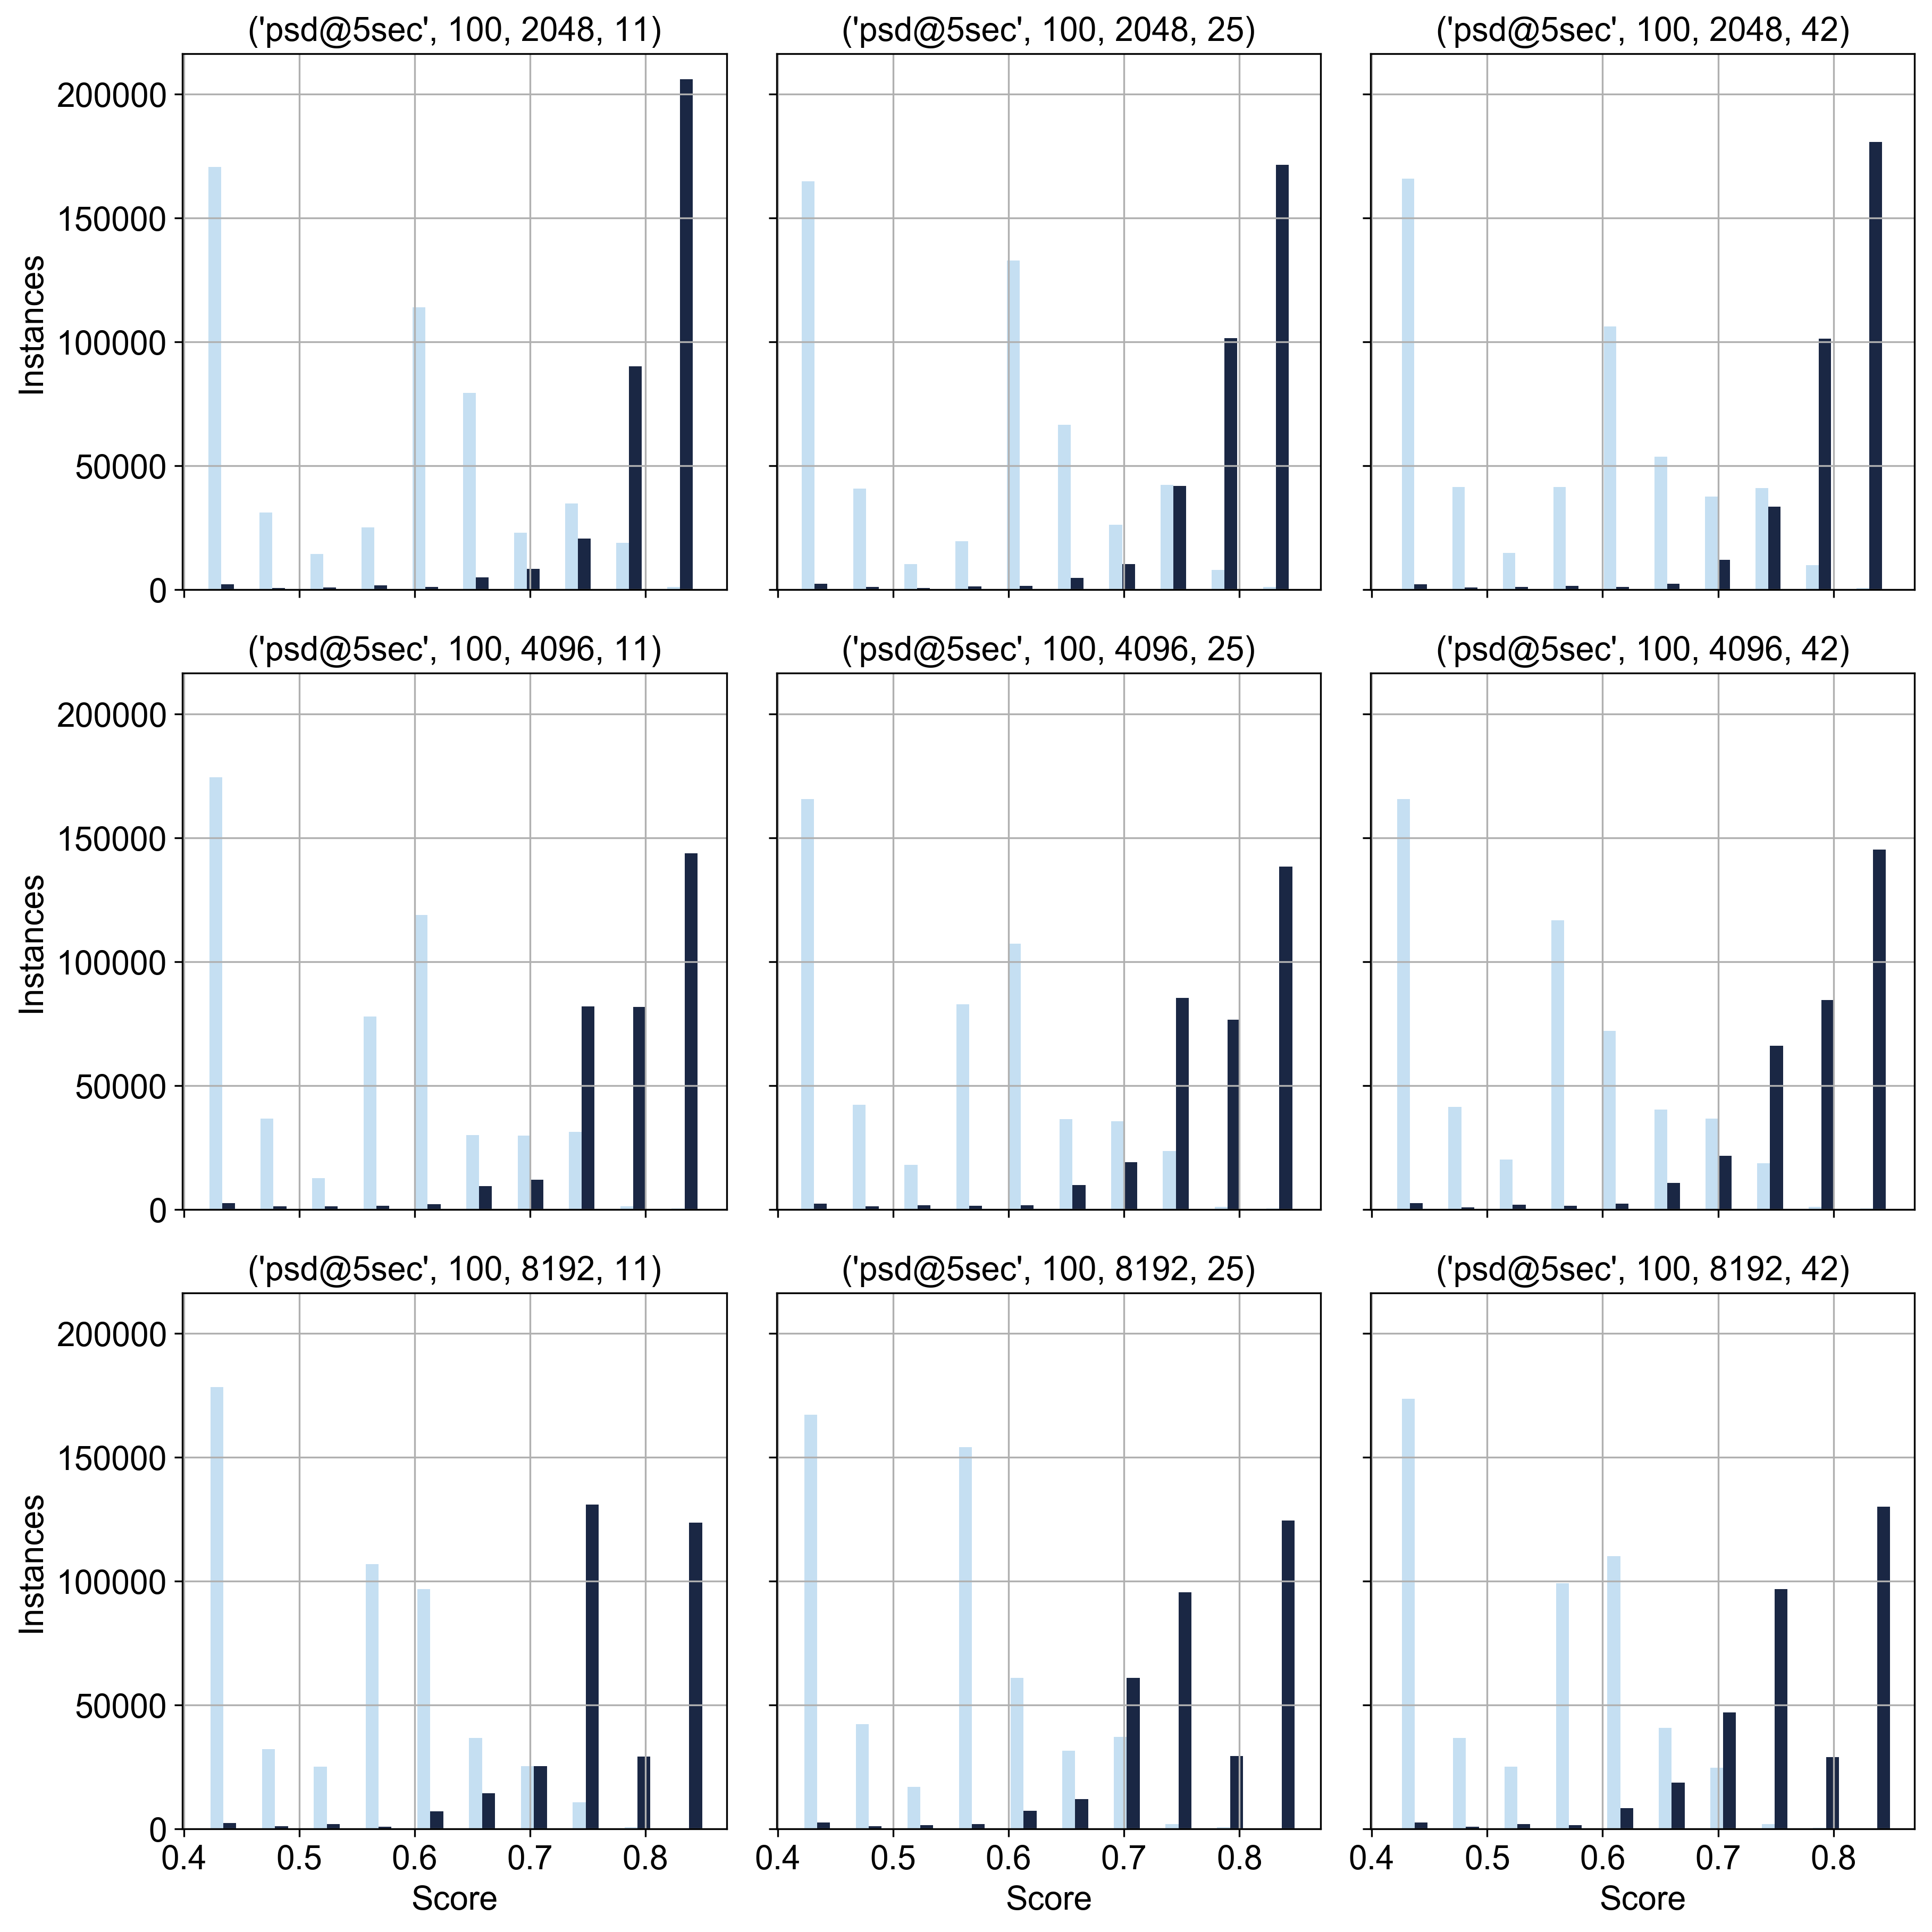

Segments Precision Recall and F1score (one row per max_sample, n_estimator=100)

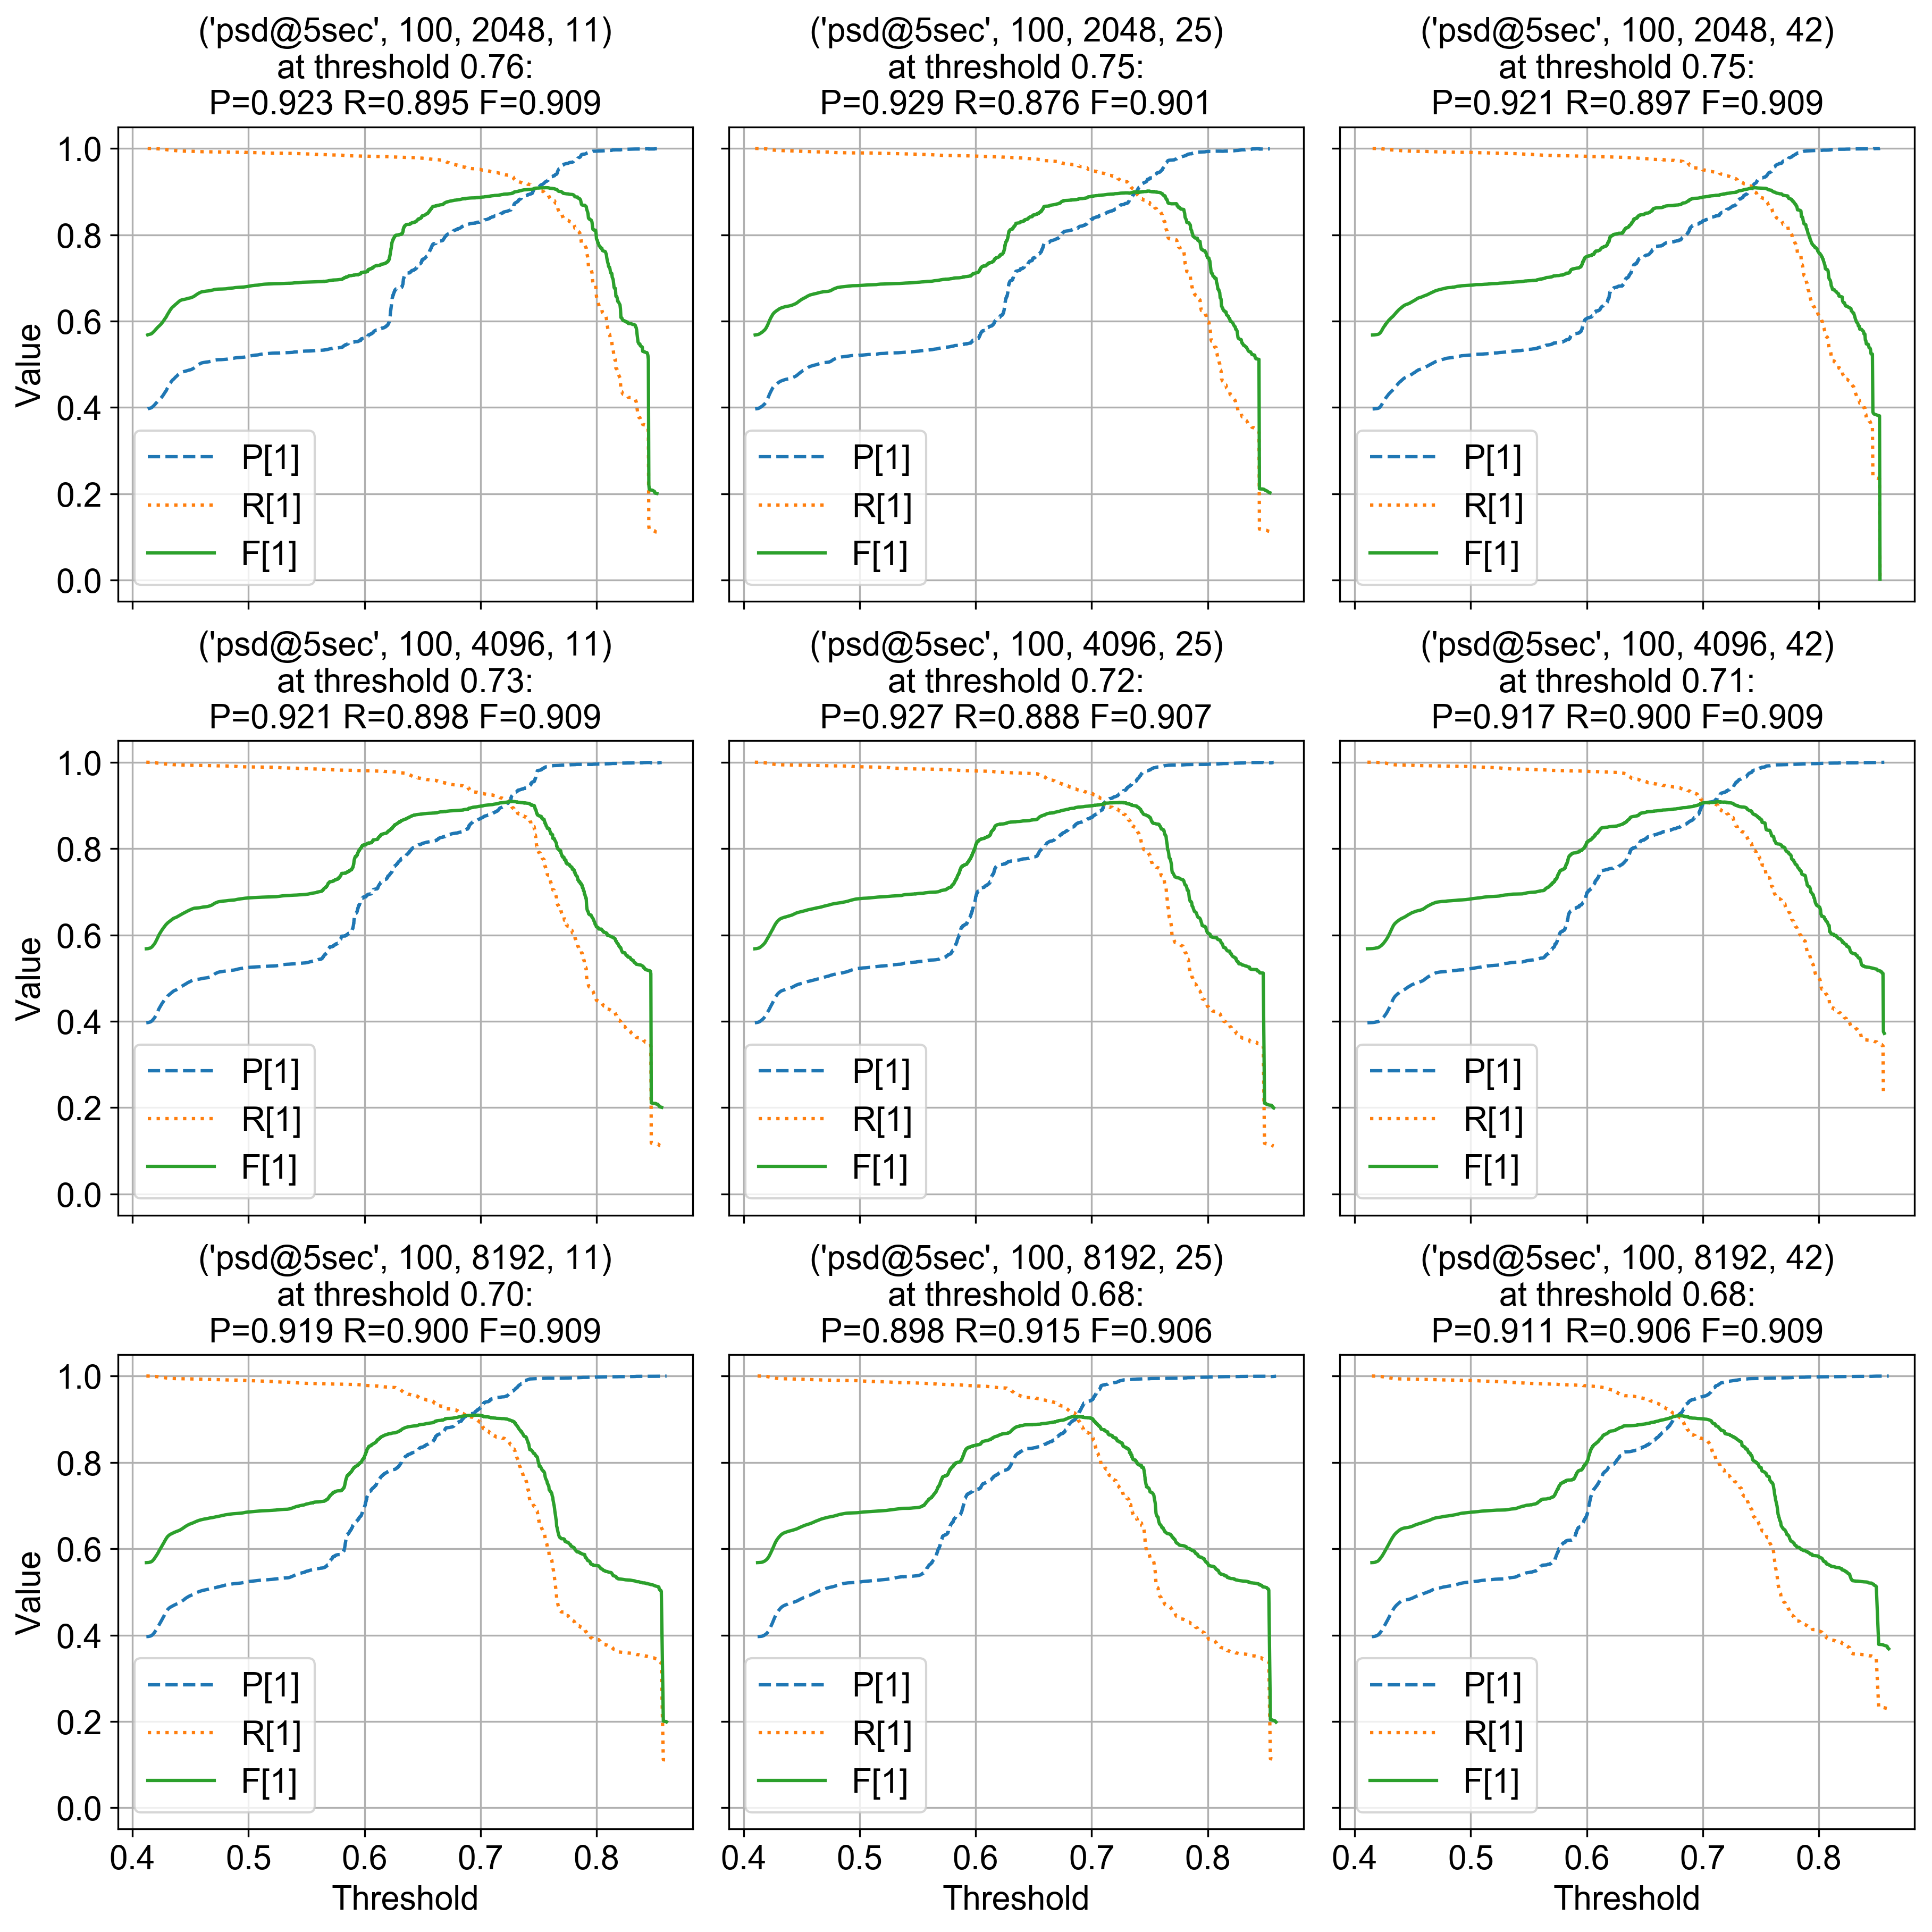

In [8]:
# group all models by feats, n_estimators, max_samples
from sod.jupyter import share
import importlib
importlib.reload(share)

n_estimators = 100
max_samples = (2048, 4096, 8192)
pred_dfs2 = {}
for key, pred_df in pred_dfs.items():
    if key.feats == 'psd@5sec' and key.n_estimators == n_estimators and key.max_samples in max_samples:
        pred_dfs2[(key.feats, key.n_estimators, key.max_samples, key.random_state)] = pred_df

pred_dfs2 = {k: pred_dfs2[k] for k in sorted(pred_dfs2)}
printhtml('<h3>Segments frequency distribution (one row per max_sample, n_estimator=%d)</h3>' % n_estimators)
share.plot_freq_distribution(pred_dfs2, ncols=3)
printhtml('<h3>Segments Precision Recall and F1score (one row per max_sample, n_estimator=%d)</h3>' % n_estimators)
share.plot_pre_rec_fscore(pred_dfs2, ncols=3)